# 학습목표
* 딥러닝 모델을 학습하기 위한 개념을 이해합니다.
* 손실함수, 옵티마이저, 지표에 대해서 학습합니다.

# 01 손실함수 (Loss Function)
* 손실이 얼마나 적으냐의 따라서 모델이 얼마나 좋은지 지표로 나타내는 것
* 손실 함수는 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 파라미터를 조정하며 학습이 진행
* 손실함수는 최적화 이론에서 최소화 하고자 하는 함수로 미분 가능한 함수를 사용
* keras에서 제공되는 주요 손실 함수
  - `sparse_categorical_crossentropy` : 클래스가 배타적 방식으로 구분 점수형으로 즉, (0,1,2, ...,9)와 같은 방식으로 구분되어 있을 때 사용한다.
  - `categorical_cross_entropy` : 클래스가 원-핫 인코딩 방식으로 되어있을 때 사용한다.
  - `binary_crossentropy` : 이진 분류를 수행할 때 사용한다.

## 평균 절대 오차 (Mean Absolute Error, MAE)
* 오차가 커져도 손실함수가 일정하게 증가한다.
* 이상치에 강건한(Robust) 특성을 가지고있다.
* 데이터에서 [입력-정답] 관계가 적절하지 않은 것이 있을 경우 좋은 추정을 하더라도 오차가 발생하는 경우가 있는데    
  이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향력이 크지 않은 특성을 가지고있다.
* 일반적으로 회귀에 많이 사용하는 손실 함수이다.

## 평균 제곱 오차 (Mean Squared Error, MSE)
* 가장 많이 사용되는 손실 함수 중 하나
* 오차가 커질수록 손실함수가 빠르게 증가하는 특성을 가지고있다.
* 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여하는 형태로 동작한다.
* 일반적으로 회귀에 사용되는 손실 함수

## 원-핫 인코딩 (One-hot incoding)
* 번주형 변수를 표현할 때 사용
* 가변수(Dummy Variable)라고도 함
* 정답인 레이블만 1이고 나머지는 0으로 처리하는 형태

## 교차 엔트로피 오차 (Cross Entropy Error, CEE)
* 이진 분류 (Binary Classification) 또는 다중 클래스 분류(Multi Class Classification)에 주로 사용된다.
* 오차는 소프트맥스(softmax) 결과와 원-핫 인코딩 사이의 출력 간 거리를 비교한다.
* 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한하게 커지게 된다.
* $E = \sum_{i=1}^{n} y_i \log \tilde{y}_i$
* 이진 분류 문제의 교차 엔트로피 (Binary Cross Entropy, BCE)
* $E = \sum_{i=1}^{2} y_i \log \tilde{y}_i$


# 02 옵티마이저 (Optimizer)
* 옵티마이저는 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정
* keras에서 여러 옵티마이저를 제공하고, 사용자가 특정 종류의 확률적 경사 하강법 지정이 가능하다.
  * `keras.optimizer.SGD()` : 기본적인 확률적 경사 하강법
  * `keras.optimizer.Adam()` : 자주 사용되는 옵티마이저
* 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일시에 포함

## 경사하강법 (Gradient Decent)
* 경사하강법은 미분과 기울기로 동작하며 스칼라를 벡터로 미분한다.
* 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0이되며 미분값이 클수록 변화량이 크다.
* 경사하강법의 과정은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정하며 $f(x)$ 의 값이 변하지 않을때까지 반복한다.
* 최적의 회로를 다 찾았다면 더 이상 반복을 하지 않는다.
     
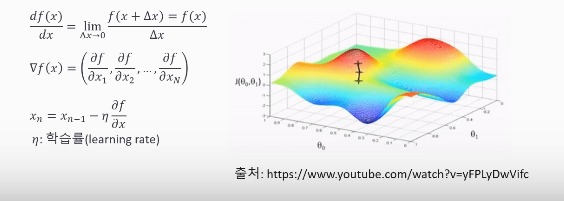
    
**도함수 식이 잘못 표기 되어 정정합니다. df(x)/dx = lim(Δx→0) [f(x + Δx) - f(x)]/Δx 로 f(x + Δx) = f(x)가 아닌 f(x + Δx) - f(x) 임을 알려드립니다.**

## 볼록 함수와 비볼록 함수 (Convex Function & Non-convex Function)
* 블록함수는 어떤 지점에서 시작하더라도 최적값 (손실함수가 최소로하는 점)에 도달 가능
* 비볼록함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음
    
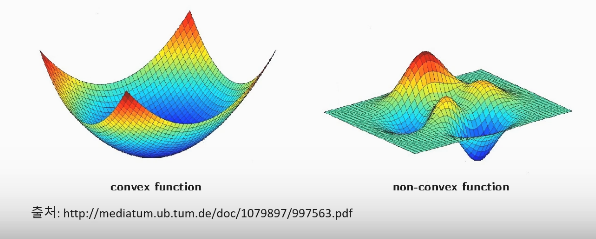

## 안장점 (Saddle Point)
* 기울기가 0이지만 극값이 되지 않는 안장점이 존재한다.
* 경사하강법은 안장점에서 벗어나지 못하는 문제가 있다.
* 기울기의 반대 방향으로 다음 위치를 이동해야하는데 기울기 값이 0이라 이동하지 못한다.

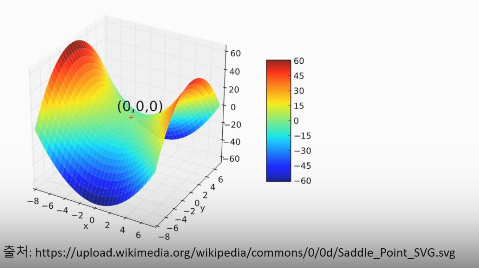

## 학습률 (Learning Rate)
* 모델을 학습하기 위해서는 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있다.
* 경사하강법을 통해 손실함수의 반대 기울기 방향으로 업데이트 할 때 업데이트 되는 크기에 관여한다.
* 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 못하는 문제가 있다.

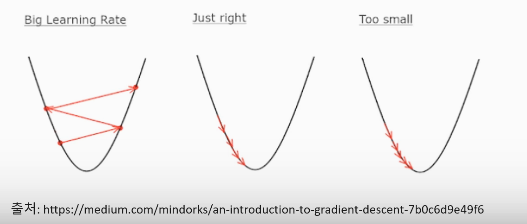

## 지표 (Metrics)
* 딥러닝 학습 시 필요한 다양한 지표들을 지정 가능하다.
* 일반적으로 `mae` 나 `accuracy`를 사용한다.
* `accuracy` 같은 경우 줄여서 `acc`로 사용이 가능하다.
* keras에서 사용되는 지표 종류 : https://keras.io/api/metrics/

# 03 딥러닝 모델 학습
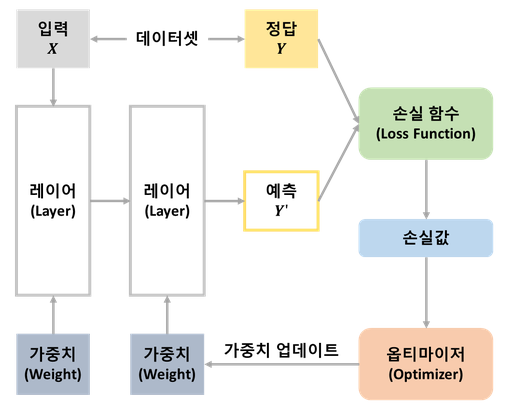
* 학습을 위한 데이터셋을 준비한다.
* 정답을 위한 정답 레이블 (Y) 입력 (X) 둘을 분리한다.
* 입력값(x)이 레이어를 통해 학습하고 예측값(Y`)을 추출한다.
* 정답(Y)와 예측값(Y`)의 차이를 손실함수 (Loss Function)으로 계산한다.
* 얼마만큼의 손실이 있는지 손실값이 나오고 손실값을 통해서 옵티마이저가 판단을 한다.
* 옵티마이저는 손실값을 통해서 가중치를 어떻게 업데이트 해야하는지 결정을 한다.
* 결정된 가중치 값이 레이어에 반영이 된다.
* 가중치 값이 반영된 레이어에서 다시 예측값(Y`)을 만들고 다시 손실함수를 계산해 손실값을 구한다.
* **위 과정을 통해서 손실값을 점점 최소값으로 옵티마이저가 동작을 하는것 이게 딥러닝 모델의 학습**이다.

## 선형회귀(Linear Regression)를 위한 딥러닝 모델 을 만들기
### 데이터 생성
데이터셋을 make_regression 함수를 이용하여 입력 $X$ 와 정답 $y$ 로 샘플 갯수(n_samples) 200개,    
특징 갯수(n_featrues) 1개에 바이어스(bias)는 5.0, 노이즈(noise)는 5.0으로 지정하고, random_state는 123으로 하여 랜덤 시드를 지정해줍니다.

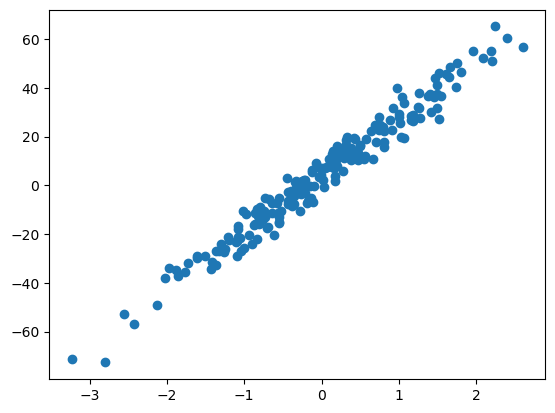

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 200, n_features = 1, bias = 5.0, noise = 5.0, random_state = 123)
y = np.expand_dims(y, axis = 1)

plt.scatter(X,y)
plt.show()

In [4]:
# 데이터는 학습용 데이터셋(x_train, y_train), 테스트용 데이터셋(x_test, y_test)으로 구분합니다.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print('='*20)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


### 모델 생성
먼저 딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트합니다.     
케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 models, layers, optimizer, utils도 임포트합니다.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

모델은 간단하게 Sequential()을 이용해 선언하고, Dense 레이어 하나를 추가해줍니다.     
레이어의 유닛수는 1개이고, activation은 선형 회귀이니 'linear'로 지정하며 input_shape은 (1,) 으로 1차원 모양으로 입력 모양을 가집니다.    
최종 모델의 구조를 summary() 함수를 통해 확인해봅니다.

In [6]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

C:\Users\nini\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

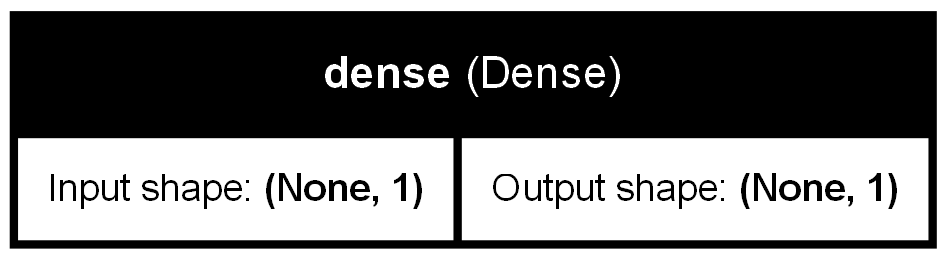

In [10]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(model, show_shapes=True, show_layer_names=True)

### 모델 학습
딥러닝 모델의 학습 진행 방식을 결정하는 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용합니다.     
compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정합니다.    
    
모델의 학습에 필요한 손실 함수로 mse를 지정하여 Mean Square Error를 사용하고, 옵티마이저는 정의했던 SGD를 사용합니다.     
지표로는 mae와 mse를 사용하는데 여기서 MAE는 Mean Absolute Error를 의미합니다.    

이제 모델 학습을 진행하기위해 fit() 함수를 호출합니다. 학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수인 epochs를 40으로 지정합니다.

In [11]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 690.0948 - mae: 20.7604 - mse: 690.0948  
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 564.7739 - mae: 19.5284 - mse: 564.7739 
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 435.3424 - mae: 16.9606 - mse: 435.3424 
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 385.1306 - mae: 15.4657 - mse: 385.1306 
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 282.7601 - mae: 13.4223 - mse: 282.7601 
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 236.8034 - mae: 12.5112 - mse: 236.8034 
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 207.0123 - mae: 11.3206 - mse: 207.0123 
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 147.6438 - mae: 9.8253 - mse: 147.6438 
Epoch 9/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 118.3706 - mae: 8.6919 - mse: 118.3706 
Epoch 10/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 114.9155 - mae: 8.4880 - mse: 114.9155 
Epoch 11/40
5/5 ━━━━━━━━━━━━━━━

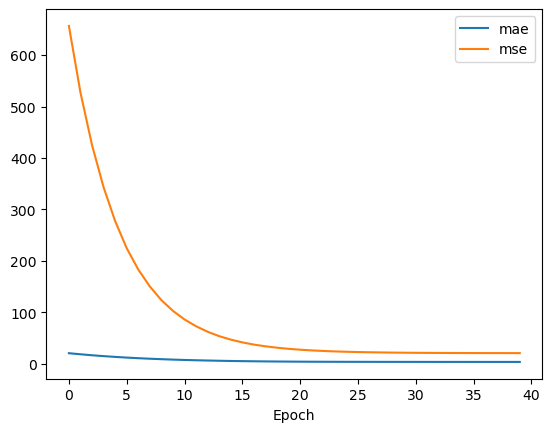

In [12]:
# 모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인합니다.
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

### 모델 평가
이제 모델의 평가를 위해 evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인합니다.

In [13]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 21.7757 - mae: 3.9642 - mse: 21.7757 


[21.93306541442871, 3.9887192249298096, 21.93306541442871]

### 모델 예측
학습된 모델을 통해 입력 데이터 $X$에 대한 예측값을 predict()를 통해 결과로 받아옵니다.     
실제 데이터의 결과값 $y$와 모델의 예측 결과인 result를 살펴봅니다

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


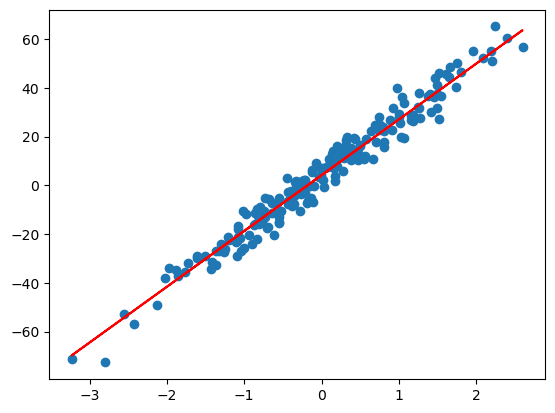

In [14]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [15]:
# 딥러닝 모델에서 사용한 레이어를 layers로 접근하여 살펴볼 수 있습니다. 
# 여기에서는 Dense 레이어 하나만 사용된 것을 알 수 있습니다.
model.layers

[<Dense name=dense, built=True>]

In [16]:
# 모델의 0번째 레이어인 layers[0]를 가져와서 layer.name으로 레이어의 이름을 확인할 수 있습니다.
# get_layer() 함수를 통해 같은 이름의 레이어를 얻을 수도 있습니다.

layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


In [17]:
# 레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있습니다. 
# 즉, 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있습니다.

weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.893007]]
[4.182348]


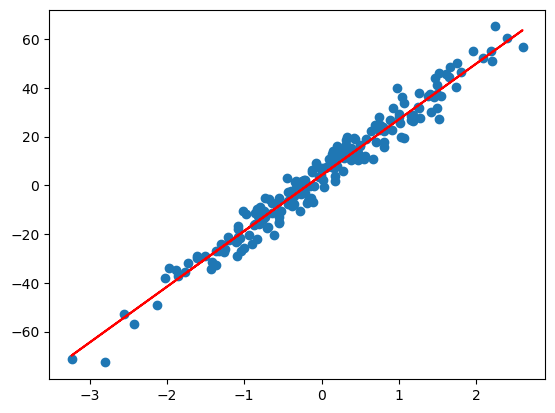

In [18]:
# 딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 
# 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있습니다.
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()

# 나의 최종 정리
**모델이 훈련되는 동안 손실이 얼마나 적으냐에 따라서 모델이 얼마나 좋은지 손실 함수를 통해 지표로 나타낼 수 있으며    
이 손실 함수를 기반으로 모델이 어떻게 업데이트 되는지 옵타마이저가 결정을한다. 여러 옵티마이저 중에서 사용자는 특정 종류의 경사 하강법을 지정할 수 있다.**

**최종 딥러닝 모델 학습이란**    
데이터셋을 입력값과 정답값으로 나누고 입력값을 레이어를 통해 예측값을 내놓고 예측값과 정답값을    
손실 함수를 이용해 손실값을 계산하고 옵티마이저가 가중치 값을 업데이트하면 레이어도 새로운 가중치 값으로 다시 예측값을 계산한다.     
이것을 여러번 반복해 손실값을 점점 최소값으로 옵티마이저가 동작을 하는것을 딥러닝 모델의 학습이다.